In [1]:
import pandas as pd

In [2]:
data_path = 'data.csv'

Читай данные с помощью __`read_csv()`__ и погнали!

In [3]:
df = pd.read_csv(data_path)
df.head()

,Возраст,Пол,Состоит в браке,Иждивенцы,Доход,Опыт работы,Срок проживания,Недвижимость(кв.м.),Месячный платеж,Благонадежный заемщик
0,28.0,женский,Да,0.0,9000.0,9.0,7.0,0.0,3946.0,Нет
1,39.0,мужской,Да,1.0,13500.0,17.0,6.0,0.0,2460.0,Да
2,31.0,мужской,Нет,2.0,7000.0,11.0,3.0,0.0,3126.0,Нет
3,34.0,мужской,Нет,1.0,10200.0,15.0,2.0,41.0,3280.0,Да
4,46.0,женский,Да,2.0,8500.0,20.0,8.0,0.0,3348.0,Да


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Причесываем колонки</h3> 
    </div>
</div>

Окей, мы прочитали данные, но с ними еще не совсем удобно работать!

Прежде всего, __переименуй колонки__ так, чтобы они все были на старом-добром английском языке. Обычно предпочитают называть их __`likeThat`, `LikeThat`__ или __`like_that`__. Выбери что-то одно.

In [4]:
new_columns = ['Age', 'Sex', 'Married', 'Dependents', 'Income', 'Experience', 
               'TermOfStay', 'RealEstate', 'MonthlyPayment', 'Trustworthy']

df.rename(columns={ old: new for old, new in zip(df.columns, new_columns) }, inplace=True)
df.head()

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy
0,28.0,женский,Да,0.0,9000.0,9.0,7.0,0.0,3946.0,Нет
1,39.0,мужской,Да,1.0,13500.0,17.0,6.0,0.0,2460.0,Да
2,31.0,мужской,Нет,2.0,7000.0,11.0,3.0,0.0,3126.0,Нет
3,34.0,мужской,Нет,1.0,10200.0,15.0,2.0,41.0,3280.0,Да
4,46.0,женский,Да,2.0,8500.0,20.0,8.0,0.0,3348.0,Да


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Язык, понятный компуктору</h3> 
    </div>
</div>

Все русские слова - вон! Да, и значения в колонках в том числе. 

Замените все значения в колонках пола, признака состояния в браке и благонадежности на нули и единицы, раз уж уникальных значений в них не больше двух. __Подсказка:__ используй метод __`map()`__.

Убедитесь, что у вас все получилось, вызвав __`value_counts()`__ у соответствующих колоночек. А потом и проверьте тип данных с помощью __`info()`__

In [5]:
df.Sex = df.Sex.map({'мужской': 1, 'женский': 0})

df.Married = df.Married.map({'Да': 1, 'Нет': 0})

df.Trustworthy = df.Trustworthy.map({'Да': 1, 'Нет': 0})

In [6]:
df.Sex.value_counts()

1.0    650
0.0    349
Name: Sex, dtype: int64

In [7]:
df.Married.value_counts()

1.0    590
0.0    409
Name: Married, dtype: int64

In [8]:
df.Trustworthy.value_counts()

0.0    507
1.0    492
Name: Trustworthy, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age               999 non-null float64
Sex               999 non-null float64
Married           999 non-null float64
Dependents        999 non-null float64
Income            999 non-null float64
Experience        999 non-null float64
TermOfStay        999 non-null float64
RealEstate        999 non-null float64
MonthlyPayment    999 non-null float64
Trustworthy       999 non-null float64
dtypes: float64(10)
memory usage: 78.2 KB


<div class="panel panel-warning" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус!</h3> 
    </div>
</div>

Удали строчку с __NaN__! Найди ее! И удали!

In [10]:
df[df.isnull().any(axis=1)]

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.dropna(inplace=True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Новые колонки</h3> 
    </div>
</div>

Помнишь еще, как создаются новые колонки? Ну ничего, погуглишь.

1. Сделай новую колонку __а-ля "удар по бюджету"__, значения в которой равны доле месячного платежа к величине дохода.
2. Посчитай в новой колонке __а-ля "размер семьи"__, сколько у заемщика человек в семье, то есть количество иждивенцев + муж/жена (если таковые имеются). 
2. Считая, что деньги в семье распределяются абсолютно честно, сделай новую колонку __а-ля "моя доля"__, значения в которой равны доходу (чистому, учитывая ежемесячный платеж!), деленному на количество человек в семье.

Вызови __.head()__ и полюбуйся в конце на результаты своей работы.

In [12]:
df['BudgetImpact'] = df.MonthlyPayment / df.Income
df['FamilyMembers'] = df.Married + df.Dependents
df['RelativeIncome'] = (df.Income - df.MonthlyPayment) / df.FamilyMembers
df.head()

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy,BudgetImpact,FamilyMembers,RelativeIncome
0,28.0,0.0,1.0,0.0,9000.0,9.0,7.0,0.0,3946.0,0.0,0.438444,1.0,5054.000000
1,39.0,1.0,1.0,1.0,13500.0,17.0,6.0,0.0,2460.0,1.0,0.182222,2.0,5520.000000
2,31.0,1.0,0.0,2.0,7000.0,11.0,3.0,0.0,3126.0,0.0,0.446571,2.0,1937.000000
3,34.0,1.0,0.0,1.0,10200.0,15.0,2.0,41.0,3280.0,1.0,0.321569,1.0,6920.000000
4,46.0,0.0,1.0,2.0,8500.0,20.0,8.0,0.0,3348.0,1.0,0.393882,3.0,1717.333333


<div class="panel panel-warning" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус!</h3> 
    </div>
</div>

Удали один какой-нибудь ненужный столбец, если хочешь. Какой-нибудь бесполезный. Но лучше не надо.

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: Время гуглить</h3> 
    </div>
</div>

В `pandas` есть функция под названием __`cut()`__, которая позволяет разбить значения признака на группы (или корзины), и присвоить каждой группе свою метку.

Например, будет неплохой идеей разбить возраст на возрастные группы: до 18 лет, до 30 лет, до 50, до 99. И сделать новую колонку с соответствующей меткой. Можно, чтобы она была строкой, да.

Как раз и вспомнишь, как новый столбец сделать.

А потом посмотри на __`.value_counts()`__ этого столбца и сделай мудрые выводы.

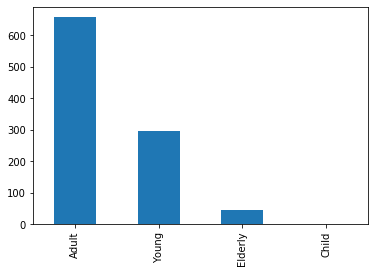

In [17]:
df['AgeGroup'] = pd.cut(df.Age, [0, 18, 30, 50, 99], labels=['Child', 'Young', 'Adult', 'Elderly'])
df.AgeGroup.value_counts().plot.bar()

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 5: Время приключений</h3> 
    </div>
</div>

Кто тут data scientist? Ты data scientist!

Докажи это! Исследуй данные вдоль и поперек!

Группируй с помощью __`.groupby()`__ строки по полу, семейному статусу и всему другому, что приходит в голову, и считай статистики: средние и медианные доходы, квадратные метры и размеры семей. Не забывай учитывать и нашу целевую переменную - благонадежность - и задавать себе вопросы, например, вот такие:

Вперед! Не подведи!

- *Правда ли, что чем больше у заемщика семья, тем большую сумму кредита он хочет получить?*

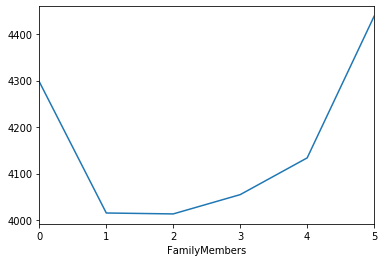

In [14]:
df.groupby('FamilyMembers').MonthlyPayment.mean().plot.line();

Получается, что да

- *Правда ли, что мужчины в среднем владеют большей площадью недвижимости?*

In [15]:
df.groupby('Sex').RealEstate.mean()

Sex
0.0    14.386819
1.0    14.884615
Name: RealEstate, dtype: float64

Почти одинаково, разница не значительная

- *Правда ли, что старшее поколение более надежно в деле выплат?*

In [16]:
gb = df.groupby('AgeGroup')
gb.Trustworthy.sum() / gb.Trustworthy.count()

AgeGroup
Child           NaN
Young      0.498316
Adult      0.473364
Elderly    0.733333
Name: Trustworthy, dtype: float64

Да, люди старше 50 лет более благонадежны.

- *Правда ли, что молодые больше зарабатывают?*

In [18]:
df.groupby('AgeGroup').Income.mean()

AgeGroup
Child               NaN
Young      12841.077441
Adult      13395.585997
Elderly    14924.444444
Name: Income, dtype: float64

Нет, люди старше 50 зарабатывают больше.